In [621]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import time
import lxml
from nba_api.stats.endpoints import commonteamroster
import matplotlib.pyplot as plt
# must also install nba_api (pip install nba_api)

In [9]:
path = r'C:\Users\royc3\Desktop\test\selenium\chromedriver.exe'
driver = webdriver.Chrome(path)
for i in range(2005,2020):  # attendance data for all 30 teams starts from 2005; due to COVID, only use data up until 2019
    base_url = f'http://www.espn.com/nba/attendance/_/year/{i}/sort/homePct'
    driver.get(base_url)

In [24]:
path = r'C:\Users\royc3\Desktop\test\selenium\chromedriver.exe'
driver = webdriver.Chrome(path)
year = 2005 # attendance data for all 30 teams starts from 2005
base_url = f'http://www.espn.com/nba/attendance/_/year/{year}/sort/homePct'
driver.get(base_url)
source = driver.page_source
parser = BeautifulSoup(driver.page_source, 'lxml')


headers_table = parser.find('div', attrs = {'class': 'mod-container mod-table mod-no-header mod-no-footer'})  # go to div where class = 'mod-container mod-table mod-no-header mod-no-footer'
headers_list = [h.text.lstrip().strip() for h in parser.findAll('tr')[1].findAll('td')[1:]]  # go to second 'tr' element and pull every 2nd 'td' element and thereafter to get list of header names

teams_list = [x.text for x in parser.findAll('a')[7:37]]

total_tix_list = [t.findAll('td')[3].text for t in parser.findAll('tr')[2:]]

avg_tix_list = [str(round(float(''.join(x.split(',')))/41,2)) for x in total_tix_list]

team_to_tix = {teams_list[i]: total_tix_list[i] for i in range(len(teams_list))}
#tix_table = parser.findAll('td', attrs = {'align': 'right'})


#tix_data 
#teams_list = [x.text for x in table.findAll('a').findAll('href')]
# headers = table.findAll('tr')[1]
# headersList = headers.findAll('td')
# for x in headersList:
#     print(x.text.lstrip().strip())
#headerlist = [h.text for h in headers.findAll('td')[1]]

In [48]:
df_headers = []
for i in range(2005, 2020):
    df_headers.append(f'{i} Total Tix Sold')
    df_headers.append(f'{i} Avg Tix Sold')

df = pd.DataFrame(index = teams_list, columns = df_headers)
for i in range(2005,2020):
    df[f'{i} Total Tix Sold'] = pd.Series(team_to_tix)
    df[f'{i} Avg Tix Sold'] = pd.Series(team_to_tix)

In [ ]:
#   In the following table, there are two unique features:
#   {year} Total Home Tix Sold = Total amount of home tickets sold for each respective team
#   {year} Avg Home Tix Sold = Average amount of home tickets sold across the year for each respective team

In [762]:
path = r'C:\Users\royc3\Desktop\test\selenium\chromedriver.exe'
driver = webdriver.Chrome(path)

teams = ['Heat', 'NY Knicks', 'Pistons', 'Kings', 'Spurs', 'Lakers', 'Thunder', 'Jazz', 'Bulls', 'Suns', 'Cavaliers', 'Pacers', 'Grizzlies', 'Timberwolves', 'Rockets', '76ers', 'Raptors', 'Celtics', 'Magic', 'Warriors', 'Trail Blazers', 'Bucks', 'Pelicans', 'Nets', 'Hornets', 'Hawks', 'Mavericks', 'Nuggets', 'Clippers', 'Wizards']


tix_df = pd.DataFrame(index = teams)

for i in range(2005, 2020):  # attendance data for all 30 teams starts from 2005; due to COVID, only use data up until 2019
    base_url = f'http://www.espn.com/nba/attendance/_/year/{i}/sort/homePct'
    driver.get(base_url)
    source = driver.page_source
    parser = BeautifulSoup(driver.page_source, 'lxml')

    #headers_table = parser.find('div', attrs = {'class': 'mod-container mod-table mod-no-header mod-no-footer'})  # go to div where class = 'mod-container mod-table mod-no-header mod-no-footer'
    #headers_list = [h.text.lstrip().strip() for h in parser.findAll('tr')[1].findAll('td')[1:]]  # go to second 'tr' element and pull every 2nd 'td' element and thereafter to get list of header names

    teams_list = [x.text for x in parser.findAll('a')[7:37]]

    total_tix_list = [t.findAll('td')[3].text for t in parser.findAll('tr')[2:]]

    if i == 2012:
        avg_tix_list = [str(round(float(''.join(x.split(',')))/33,2)) for x in total_tix_list]
    else:
        avg_tix_list = [str(round(float(''.join(x.split(',')))/41,2)) for x in total_tix_list]

    team_to_total_tix = {teams_list[i]: total_tix_list[i] for i in range(len(teams_list))}
    team_to_avg_tix = {teams_list[i]: avg_tix_list[i] for i in range(len(teams_list))}

    tix_df[f'{i} Total Home Tix Sold'] = pd.Series(team_to_total_tix)
    tix_df[f'{i} Avg Home Tix Sold'] = pd.Series(team_to_avg_tix)

tix_df

,2005 Total Home Tix Sold,2005 Avg Home Tix Sold,2006 Total Home Tix Sold,2006 Avg Home Tix Sold,2007 Total Home Tix Sold,2007 Avg Home Tix Sold,2008 Total Home Tix Sold,2008 Avg Home Tix Sold,2009 Total Home Tix Sold,2009 Avg Home Tix Sold,...,2015 Total Home Tix Sold,2015 Avg Home Tix Sold,2016 Total Home Tix Sold,2016 Avg Home Tix Sold,2017 Total Home Tix Sold,2017 Avg Home Tix Sold,2018 Total Home Tix Sold,2018 Avg Home Tix Sold,2019 Total Home Tix Sold,2019 Avg Home Tix Sold
Heat,"815,143",19881.54,"818,149",19954.85,"808,541",19720.51,"798,004",19463.51,"729,178",17784.83,...,"808,223",19712.76,"809,350",19740.24,"805,400",19643.9,"785,250",19152.44,"805,264",19640.59
NY Knicks,"800,144",19515.71,"776,176",18931.12,"771,017",18805.29,"783,739",19115.59,"790,801",19287.83,...,"812,292",19812.0,"812,292",19812.0,"810,741",19774.17,"792,608",19331.9,"779,087",19002.12
Pistons,"905,116",22076.0,"905,116",22076.0,"905,116",22076.0,"905,116",22076.0,"896,971",21877.34,...,"625,917",15266.27,"677,138",16515.56,"655,141",15979.05,"713,945",17413.29,"675,963",16486.9
Kings,"709,997",17317.0,"709,997",17317.0,"709,997",17317.0,"580,181",14150.76,"502,852",12264.68,...,"680,049",16586.56,"707,526",17256.73,"721,928",17608.0,"649,571",15843.2,"700,975",17096.95
Spurs,"750,970",18316.34,"770,677",18797.0,"764,823",18654.22,"761,149",18564.61,"749,048",18269.46,...,"762,855",18606.22,"756,445",18449.88,"755,347",18423.1,"754,562",18403.95,"750,616",18307.71
Lakers,"770,494",18792.54,"774,189",18882.66,"778,415",18985.73,"778,877",18997.0,"778,877",18997.0,...,"768,244",18737.66,"778,877",18997.0,"776,917",18949.2,"776,327",18934.8,"778,877",18997.0
Thunder,"675,490",16475.37,"664,157",16198.95,"654,163",15955.2,"547,556",13355.02,"747,732",18237.37,...,"746,323",18203.0,"746,323",18203.0,"746,323",18203.0,"746,323",18203.0,"746,323",18203.0
Jazz,"769,014",18756.44,"751,621",18332.22,"802,214",19566.2,"816,211",19907.59,"816,042",19903.46,...,"772,059",18830.71,"791,489",19304.61,"806,605",19673.29,"734,806",17922.1,"750,546",18306.0
Bulls,"828,384",20204.49,"868,720",21188.29,"912,364",22252.78,"901,502",21987.85,"847,903",20680.56,...,"875,091",21343.68,"894,659",21820.95,"888,882",21680.05,"851,824",20776.2,"823,475",20084.76
Suns,"726,066",17708.93,"730,179",17809.24,"755,302",18422.0,"755,302",18422.0,"755,302",18422.0,...,"693,862",16923.46,"701,405",17107.44,"708,639",17283.88,"674,655",16455.0,"627,023",15293.24


In [763]:
print(tix_df['2013 Avg Home Tix Sold']['Pistons'], tix_df['2012 Avg Home Tix Sold']['Warriors'])

14782.78 18857.91


In [672]:
tix_df.isna().sum() 

2005 Total Home Tix Sold    0
2005 Avg Home Tix Sold      0
2006 Total Home Tix Sold    0
2006 Avg Home Tix Sold      0
2007 Total Home Tix Sold    0
2007 Avg Home Tix Sold      0
2008 Total Home Tix Sold    0
2008 Avg Home Tix Sold      0
2009 Total Home Tix Sold    0
2009 Avg Home Tix Sold      0
2010 Total Home Tix Sold    0
2010 Avg Home Tix Sold      0
2011 Total Home Tix Sold    0
2011 Avg Home Tix Sold      0
2012 Total Home Tix Sold    0
2012 Avg Home Tix Sold      0
2013 Total Home Tix Sold    0
2013 Avg Home Tix Sold      0
2014 Total Home Tix Sold    0
2014 Avg Home Tix Sold      0
2015 Total Home Tix Sold    0
2015 Avg Home Tix Sold      0
2016 Total Home Tix Sold    0
2016 Avg Home Tix Sold      0
2017 Total Home Tix Sold    0
2017 Avg Home Tix Sold      0
2018 Total Home Tix Sold    0
2018 Avg Home Tix Sold      0
2019 Total Home Tix Sold    0
2019 Avg Home Tix Sold      0
dtype: int64

Text(0, 0.5, 'Leaguewide Average Home Tix Sales')

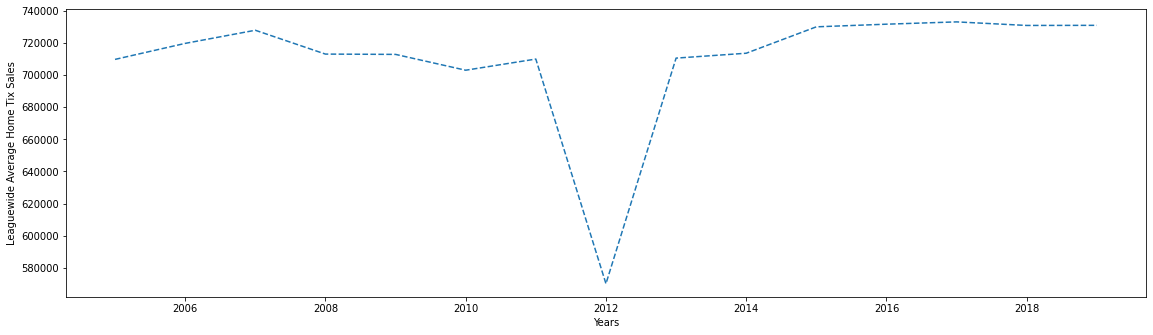

In [671]:
#graph league average of home tix sales

total_avg_home_dict = {}
for year in range(2005, 2020):

    home_tix_sum = 0

    for team in teams_list:
        home_tix_sum += int(''.join(tix_df[f'{year} Total Home Tix Sold'][team].split(',')))
    
    total_avg_home_dict[year]= home_tix_sum/30

fig_total_home_tix = plt.figure(figsize = (15,4))
ax = fig_total_home_tix.add_axes([0, 0 , 1, 1])
ax.plot(total_avg_home_dict.keys(), total_avg_home_dict.values(), '--')
ax.set_xlabel('Years')
ax.set_ylabel('Leaguewide Average Home Tix Sales')


#   The significant decrease in average ticket sales in 2012 was due to the NBA lockout, decreasing the total amount of tickets sold

In [180]:
def top50(year1, year2):
    ind = range(1,51)
    top50_df = pd.DataFrame(index = ind)

    for year in range(year1, year2):
        base_url = f'http://www.espn.com/nba/seasonleaders/_/league/nba/year/{year}'
        driver.get(base_url)
        source = driver.page_source
        parser = BeautifulSoup(driver.page_source, 'lxml')
        top50_players = [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[2:12]] + [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[13:23]] + [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[24:34]] + [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[35:45]] + [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[46:56]]

        top50_df[f'{year} Top 50'] = top50_players
        #player_df = pd.DataFrame(data = top50_players, columns = ['2005 Top 50'])
        #player_df.index = np.arange(1, len(player_df) + 1)
    return top50_df

top50(2005, 2020)

,2005 Top 50,2006 Top 50,2007 Top 50,2008 Top 50,2009 Top 50,2010 Top 50,2011 Top 50,2012 Top 50,2013 Top 50,2014 Top 50,2015 Top 50,2016 Top 50,2017 Top 50,2018 Top 50,2019 Top 50
1,Kevin Garnett,LeBron James,Kobe Bryant,LeBron James,LeBron James,LeBron James,LeBron James,LeBron James,LeBron James,Kevin Durant,Russell Westbrook,Stephen Curry,Russell Westbrook,LeBron James,James Harden
2,LeBron James,Kobe Bryant,Dwyane Wade,Kobe Bryant,Dwyane Wade,Kevin Durant,Dwight Howard,Kevin Durant,Kevin Durant,LeBron James,Anthony Davis,Kevin Durant,James Harden,James Harden,Giannis Antetokounmpo
3,Allen Iverson,Allen Iverson,Kevin Garnett,Chris Paul,Chris Paul,Dwyane Wade,Kevin Durant,Kevin Love,Kobe Bryant,Kevin Love,James Harden,James Harden,LeBron James,Anthony Davis,Anthony Davis
4,Dirk Nowitzki,Dwyane Wade,LeBron James,Amar'e Stoudemire,Kobe Bryant,Chris Bosh,Dwyane Wade,Dwight Howard,James Harden,Stephen Curry,DeMarcus Cousins,Russell Westbrook,Anthony Davis,Russell Westbrook,LeBron James
5,Kobe Bryant,Kevin Garnett,Gilbert Arenas,Allen Iverson,Dirk Nowitzki,Chris Paul,Derrick Rose,Kobe Bryant,Carmelo Anthony,Carmelo Anthony,LeBron James,LeBron James,Kevin Durant,Giannis Antetokounmpo,Joel Embiid
6,Amar'e Stoudemire,Elton Brand,Dirk Nowitzki,Dirk Nowitzki,Dwight Howard,Carmelo Anthony,Amar'e Stoudemire,Chris Paul,Russell Westbrook,Blake Griffin,Stephen Curry,DeMarcus Cousins,DeMarcus Cousins,DeMarcus Cousins,Russell Westbrook
7,Tracy McGrady,Dirk Nowitzki,Carmelo Anthony,Carmelo Anthony,Al Jefferson,Kobe Bryant,Kevin Love,Blake Griffin,Stephen Curry,Chris Paul,Kevin Durant,Anthony Davis,Karl-Anthony Towns,Kevin Durant,Karl-Anthony Towns
8,Dwyane Wade,Gilbert Arenas,Yao Ming,Dwight Howard,Chris Bosh,David Lee,Blake Griffin,Dwyane Wade,Chris Paul,James Harden,Chris Paul,Chris Paul,Giannis Antetokounmpo,Stephen Curry,Paul George
9,Metta World Peace,Shawn Marion,Steve Nash,Yao Ming,Danny Granger,Dirk Nowitzki,Deron Williams,Russell Westbrook,LaMarcus Aldridge,DeMarcus Cousins,Blake Griffin,John Wall,John Wall,Damian Lillard,Kevin Durant
10,Shaquille O'Neal,Paul Pierce,Allen Iverson,Dwyane Wade,Kevin Durant,Deron Williams,Russell Westbrook,Derrick Rose,Dwyane Wade,LaMarcus Aldridge,LaMarcus Aldridge,Damian Lillard,Isaiah Thomas,Karl-Anthony Towns,Stephen Curry


In [ ]:
#   The following table lists the top 50 players for each respective year.
#   These players are defined as "stars"

In [368]:
ind = range(1,51)
top50_df = pd.DataFrame(index = ind)  #table for top 50 players from 2005-2019

for year in range(2005, 2020):
    base_url = f'http://www.espn.com/nba/seasonleaders/_/league/nba/year/{year}'
    driver.get(base_url)
    source = driver.page_source
    parser = BeautifulSoup(driver.page_source, 'lxml')
    top50_players = [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[2:12]] + [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[13:23]] + [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[24:34]] + [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[35:45]] + [x.findAll('td')[1].text.split(',')[0] for x in parser.findAll('tr')[46:56]]

    top50_df[f'{year} Top 50'] = top50_players
top50_df

,2005 Top 50,2006 Top 50,2007 Top 50,2008 Top 50,2009 Top 50,2010 Top 50,2011 Top 50,2012 Top 50,2013 Top 50,2014 Top 50,2015 Top 50,2016 Top 50,2017 Top 50,2018 Top 50,2019 Top 50
1,Kevin Garnett,LeBron James,Kobe Bryant,LeBron James,LeBron James,LeBron James,LeBron James,LeBron James,LeBron James,Kevin Durant,Russell Westbrook,Stephen Curry,Russell Westbrook,LeBron James,James Harden
2,LeBron James,Kobe Bryant,Dwyane Wade,Kobe Bryant,Dwyane Wade,Kevin Durant,Dwight Howard,Kevin Durant,Kevin Durant,LeBron James,Anthony Davis,Kevin Durant,James Harden,James Harden,Giannis Antetokounmpo
3,Allen Iverson,Allen Iverson,Kevin Garnett,Chris Paul,Chris Paul,Dwyane Wade,Kevin Durant,Kevin Love,Kobe Bryant,Kevin Love,James Harden,James Harden,LeBron James,Anthony Davis,Anthony Davis
4,Dirk Nowitzki,Dwyane Wade,LeBron James,Amar'e Stoudemire,Kobe Bryant,Chris Bosh,Dwyane Wade,Dwight Howard,James Harden,Stephen Curry,DeMarcus Cousins,Russell Westbrook,Anthony Davis,Russell Westbrook,LeBron James
5,Kobe Bryant,Kevin Garnett,Gilbert Arenas,Allen Iverson,Dirk Nowitzki,Chris Paul,Derrick Rose,Kobe Bryant,Carmelo Anthony,Carmelo Anthony,LeBron James,LeBron James,Kevin Durant,Giannis Antetokounmpo,Joel Embiid
6,Amar'e Stoudemire,Elton Brand,Dirk Nowitzki,Dirk Nowitzki,Dwight Howard,Carmelo Anthony,Amar'e Stoudemire,Chris Paul,Russell Westbrook,Blake Griffin,Stephen Curry,DeMarcus Cousins,DeMarcus Cousins,DeMarcus Cousins,Russell Westbrook
7,Tracy McGrady,Dirk Nowitzki,Carmelo Anthony,Carmelo Anthony,Al Jefferson,Kobe Bryant,Kevin Love,Blake Griffin,Stephen Curry,Chris Paul,Kevin Durant,Anthony Davis,Karl-Anthony Towns,Kevin Durant,Karl-Anthony Towns
8,Dwyane Wade,Gilbert Arenas,Yao Ming,Dwight Howard,Chris Bosh,David Lee,Blake Griffin,Dwyane Wade,Chris Paul,James Harden,Chris Paul,Chris Paul,Giannis Antetokounmpo,Stephen Curry,Paul George
9,Metta World Peace,Shawn Marion,Steve Nash,Yao Ming,Danny Granger,Dirk Nowitzki,Deron Williams,Russell Westbrook,LaMarcus Aldridge,DeMarcus Cousins,Blake Griffin,John Wall,John Wall,Damian Lillard,Kevin Durant
10,Shaquille O'Neal,Paul Pierce,Allen Iverson,Dwyane Wade,Kevin Durant,Deron Williams,Russell Westbrook,Derrick Rose,Dwyane Wade,LaMarcus Aldridge,LaMarcus Aldridge,Damian Lillard,Isaiah Thomas,Karl-Anthony Towns,Stephen Curry


In [463]:
from nba_api.stats.static import teams
team_dict = teams.get_teams()
teams_id = {'Warriors': '1610612744',
 'Mavericks': '1610612742'}
#  'Bucks': '1610612749',
#  '76ers': '1610612755',
#  'Trail Blazers': '1610612757',
#  'Heat': '1610612748',
#  'Rockets': '1610612745',
#  'Raptors': '1610612761',
#  'Celtics': '1610612738',
#  'Thunder': '1610612760',
#  'Jazz': '1610612762',
#  'Lakers': '1610612747'}
#  'Cavaliers': '1610612739',
#  'Spurs': '1610612759',
#  'Kings': '1610612758',
#  'Bulls': '1610612741',
#  'NY Knicks': '1610612752',
#  'Nuggets': '1610612743',
#  'Magic': '1610612753',
#  'Pelicans': '1610612740',
#  'Pacers': '1610612754',
#  'Clippers': '1610612746',
#  'Hornets': '1610612766',
#  'Wizards': '1610612764',
#  'Grizzlies': '1610612763',
#  'Nets': '1610612751',
#  'Suns': '1610612756',
#  'Hawks':'1610612737',
#  'Timberwolves': '1610612750',
#  'Pistons': '1610612765'}
# star_count_df = pd.DataFrame(index = teams_id.keys())
# for id in teams_id.values():
#     for index, year in enumerate(range(2004,2007)):
#         count = 0
#         teamfinder = commonteamroster.CommonTeamRoster(season=year, team_id=id, league_id_nullable='00')
#         teams = teamfinder.get_data_frames()[0]
#         players = [x for x in teams['PLAYER']]
#         for x in players:
#             if x in str(top50_df[f'{year + 1} Top 50']):
#                 count += 1
#         star_count_df[f'{year + 1} Star Count'] = count
#         time.sleep(1)
# star_count_df


dates_header = ['2005 Star Count', '2006 Star Count', '2007 Star Count', '2008 Star Count', '2009 Star Count', '2010 Star Count', '2011 Star Count', '2012 Star Count', '2013 Star Count', '2014 Star Count', '2015 Star Count', '2016 Star Count', '2017 Star Count', '2018 Star Count', '2019 Star Count']
star_count_df = pd.DataFrame(index = teams_id.keys(), columns = dates_header)


for team, id in teams_id.items():
    for index, year in enumerate(range(2004,2019)):
        count = 0
        teamfinder = commonteamroster.CommonTeamRoster(season=year, team_id=id, league_id_nullable='00')
        teams = teamfinder.get_data_frames()[0]
        time.sleep(2)
        players = [x for x in teams['PLAYER']]
        for x in players:
            if x in str(top50_df[f'{year + 1} Top 50']):
                count += 1
        star_count_df[f'{year + 1} Star Count'][team] = count
        year += 1

star_count_df

ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

In [ ]:
#   The following table finds how many star players each team had during each respective year

In [466]:
# teams_id = ['1610612744',
# '1610612742',
# '1610612749',
# '1610612755',
# '1610612757',
# '1610612748',
# '1610612745',
# '1610612761',
# '1610612738',
# '1610612760',
# '1610612762',
# '1610612747',
# '1610612739',
# '1610612759',
# '1610612758',
# '1610612741',
# '1610612752',
# '1610612743',
# '1610612753',
# '1610612740',
# '1610612754',
# '1610612746',
# '1610612766',
# '1610612764',
# '1610612763',
# '1610612751',
# '1610612756',
# '1610612737',
# '1610612750',
# '1610612765']

teams_id = {'Warriors': '1610612744',
 'Mavericks': '1610612742',
 'Bucks': '1610612749',
 '76ers': '1610612755',
 'Trail Blazers': '1610612757',
 'Heat': '1610612748',
 'Rockets': '1610612745',
 'Raptors': '1610612761',
 'Celtics': '1610612738',
 'Thunder': '1610612760',
 'Jazz': '1610612762',
 'Lakers': '1610612747',
 'Cavaliers': '1610612739',
 'Spurs': '1610612759',
 'Kings': '1610612758',
 'Bulls': '1610612741',
 'NY Knicks': '1610612752',
 'Nuggets': '1610612743',
 'Magic': '1610612753',
 'Pelicans': '1610612740',
 'Pacers': '1610612754',
 'Clippers': '1610612746',
 'Hornets': '1610612766',
 'Wizards': '1610612764',
 'Grizzlies': '1610612763',
 'Nets': '1610612751',
 'Suns': '1610612756',
 'Hawks':'1610612737',
 'Timberwolves': '1610612750',
 'Pistons': '1610612765'}
path = r'C:\Users\royc3\Desktop\test\selenium\chromedriver.exe'
driver = webdriver.Chrome(path)
dates = ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19']
dates_header = ['2005 Star Count', '2006 Star Count', '2007 Star Count', '2008 Star Count', '2009 Star Count', '2010 Star Count', '2011 Star Count', '2012 Star Count', '2013 Star Count', '2014 Star Count', '2015 Star Count', '2016 Star Count', '2017 Star Count', '2018 Star Count', '2019 Star Count']
star_count_df = pd.DataFrame(index = teams_id.keys(), columns = dates_header)


for team, id in teams_id.items():
    s_date = 2005       #starting date for for-loop
    for year in dates:
        count = 0
        base_url = f'https://www.nba.com/stats/team/{id}/?Season={year}' #  Website used to gather team's rosters during a specified year
        driver.get(base_url)
        time.sleep(2)
        source = driver.page_source
        parser = BeautifulSoup(driver.page_source, 'lxml')
        players = [x.findAll('a')[0].text for x in parser.findAll('div', attrs = {'class': 'nba-stat-table__overlay'})[0].findAll('tr')[1:]]
        for x in players:
            if x in str(top50_df[f'{s_date} Top 50']):
                count += 1
        star_count_df[f'{s_date} Star Count'][team] = count
        s_date += 1

star_count_df

# star_count_df = pd.DataFrame(index = teams_id.keys())
# for id in teams_id.values():
#     for index, year in enumerate(range(2004,2019)):
#         count = 0
#         teamfinder = commonteamroster.CommonTeamRoster(season=year, team_id=id, league_id_nullable='00')
#         teams = teamfinder.get_data_frames()[0]
#         players = [x for x in teams['PLAYER']]
#         for x in players:
#             if x in str(top50_df[f'{year + 1} Top 50']):
#                 count += 1
#         star_count_df[f'{year} Star Count'] = count

,2005 Star Count,2006 Star Count,2007 Star Count,2008 Star Count,2009 Star Count,2010 Star Count,2011 Star Count,2012 Star Count,2013 Star Count,2014 Star Count,2015 Star Count,2016 Star Count,2017 Star Count,2018 Star Count,2019 Star Count
Warriors,2,2,1,2,3,3,3,2,2,2,2,3,4,4,4
Mavericks,1,1,2,3,2,2,1,1,1,2,1,0,0,0,1
Bucks,1,1,2,1,1,1,1,2,2,0,0,3,2,3,1
76ers,2,2,1,2,2,1,2,1,1,2,0,0,1,2,4
Trail Blazers,1,0,1,1,2,2,1,1,3,3,2,2,2,2,2
Heat,2,2,1,2,1,1,3,3,3,2,2,3,2,1,0
Rockets,2,2,2,2,1,2,2,1,1,3,2,2,1,3,3
Raptors,1,2,1,1,2,1,1,1,1,2,2,2,2,2,3
Celtics,2,2,2,2,3,2,3,3,3,1,0,1,2,1,1
Thunder,2,2,2,0,1,2,2,3,2,3,2,2,1,2,2


In [474]:
teams_id = {'Warriors': '1610612744'}
zzz = ['2019']

for team, id in teams_id.items():
    for year in zzz:
        la = f'https://www.nba.com/stats/team/{id}/?Season=2018-19'
        driver.get(la)
        time.sleep(2)
        source = driver.page_source
        parser = BeautifulSoup(driver.page_source, 'lxml')
        zz = [x.findAll('a')[0].text for x in parser.findAll('div', attrs = {'class': 'nba-stat-table__overlay'})[0].findAll('tr')[1:]]
        for x in zz:
            if x in str(top50_df[f'{year} Top 50']):
                print(x)

DeMarcus Cousins
Klay Thompson
Stephen Curry
Kevin Durant


## ignore bottom two

In [364]:
path = r'C:\Users\royc3\Desktop\test\selenium\chromedriver.exe'
driver = webdriver.Chrome(path)
teams_id = {'Lakers': '1610612747'}
dates = ['2004-05']
s_date = 2005 #starting date for for-loop
star_count_df = pd.DataFrame(index = teams_id.keys())
l = []

base_url = 'https://www.nba.com/stats/team/1610612747/?Season=2004-05'
driver.get(base_url)
source = driver.page_source
parser = BeautifulSoup(driver.page_source, 'lxml')
#players = [x.text for x in parser.findAll('tr').findAll('td')[0]]
#players = [x.findAll('td')[0].text for x in parser.findAll('div', attrs = {'class': 'nba-stat-stable__overflow'}).findAll('tr')[1:]]
# for x in parser.findAll('div', attrs = {'class': 'nba-stat-table__overlay'})[0].findAll('tr')[1:]:
#     l.append(x.findAll('a')[0].text)
l = [x.findAll('a')[0].text for x in parser.findAll('div', attrs = {'class': 'nba-stat-table__overlay'})[0].findAll('tr')[1:]]
#headers_table = parser.find('div', attrs = {'class': 'mod-container mod-table mod-no-header mod-no-footer'})  # go to div where class = 'mod-container mod-table mod-no-header mod-no-footer'
#headers_list = [h.text.lstrip().strip() for h in parser.findAll('tr')[1].findAll('td')[1:]]  # go to second 'tr' element and pull every 2nd 'td' element and thereafter to get list of header names
l

['Caron Butler',
 'Devean George',
 'Luke Walton',
 'Kobe Bryant',
 'Chucky Atkins',
 'Vlade Divac',
 'Slava Medvedenko',
 'Sasha Vujacic',
 'Jumaine Jones',
 'Chris Mihm',
 'Brian Cook',
 'Brian Grant']

In [475]:
star_count_df_copy = star_count_df
star_count_df_copy1 = star_count_df

In [ ]:
# star_count_df = pd.DataFrame(index = teams_id.keys())
# for id in teams_id.values():
#     for index, year in enumerate(range(2004,2019)):
#         count = 0
#         teamfinder = commonteamroster.CommonTeamRoster(season=year, team_id=id, league_id_nullable='00')
#         teams = teamfinder.get_data_frames()[0]
#         players = [x for x in teams['PLAYER']]
#         for x in players:
#             if x in str(top50_df[f'{year + 1} Top 50']):
#                 count += 1
#         star_count_df[f'{year + 1} Star Count'] = count
#         time.sleep(1)
# star_count_df


tix_info_dummy = tix_info
tix_info_dummy.columns = np.arange(len())
df1 = pd.DataFrame(star_count_df, index = tix_info.index, columns = tix_info_dummy[2::3] + .5)


## here

In [733]:
zteams_id = {'Warriors': '1610612744',
 'Mavericks': '1610612742',
 'Bucks': '1610612749',
 '76ers': '1610612755',
 'Trail Blazers': '1610612757',
 'Heat': '1610612748',
 'Rockets': '1610612745',
 'Raptors': '1610612761',
 'Celtics': '1610612738',
 'Thunder': '1610612760',
 'Jazz': '1610612762',
 'Lakers': '1610612747',
 'Cavaliers': '1610612739',
 'Spurs': '1610612759',
 'Kings': '1610612758',
 'Bulls': '1610612741',
 'NY Knicks': '1610612752',
 'Nuggets': '1610612743',
 'Magic': '1610612753',
 'Pelicans': '1610612740',
 'Pacers': '1610612754',
 'Clippers': '1610612746',
 'Hornets': '1610612766',
 'Wizards': '1610612764',
 'Grizzlies': '1610612763',
 'Nets': '1610612751',
 'Suns': '1610612756',
 'Hawks':'1610612737',
 'Timberwolves': '1610612750',
 'Pistons': '1610612765'}
dfz = pd.DataFrame(index = zteams_id.keys())
tix_df_dummy = tix_df

result = []

for team in zteams_id.keys():
    for year in range(2005, 2019):
        star_diff = 0
        tix_diff = 0
        perc_change = 0
        star_diff = star_count_df_copy[f'{year + 1} Star Count'][team] - star_count_df_copy[f'{year} Star Count'][team]
        tix_diff = int(''.join(tix_info_dummy[f'{year+1} Total Tix Sold'][team].split(','))) - int(''.join(tix_info_dummy[f'{year} Total Tix Sold'][team].split(',')))
        perc_change = '{:.2f}'.format((float(tix_diff)/float(''.join(tix_info_dummy[f'{year} Total Tix Sold'][team].split(',')))) * 100)
        if star_diff > 0:
            col_name1 = f'{year} - {year+1} change in stars'
            col_name2 = f'{year} - {year+1} change in attendance' 
            col_name3 = f'{year} - {year+1} % change in attendance'
            dfz.loc[team, col_name1] = star_diff
            dfz.loc[team, col_name2] = tix_diff
            dfz.loc[team, col_name3] = str(perc_change)+'%'
        elif star_diff < 0:
            col_name1 = f'{year} - {year+1} change in stars'
            col_name2 = f'{year} - {year+1} change in attendance'
            col_name3 = f'{year} - {year+1} % change in attendance' 
            dfz.loc[team, col_name1] = star_diff
            dfz.loc[team, col_name2] = tix_diff
            dfz.loc[team, col_name3] = str(perc_change)+'%'
        else:
            col_name1 = f'{year} - {year+1} change in stars'
            col_name2 = f'{year} - {year+1} change in attendance' 
            col_name3 = f'{year} - {year+1} % change in attendance'
            dfz.loc[team, col_name1] = star_diff
            dfz.loc[team, col_name2] = tix_diff #0
            dfz.loc[team, col_name3] = str(perc_change)+'%'

# for team in zteams_id.keys():
#     for year in range(2005, 2019):
#         if star_count_df_copy[f'{year + 1} Star Count'][team] > star_count_df_copy[f'{year} Star Count'][team]:
#             dfz[f'{year} - {year+1} change in Stars'][team] = ''
#             dfz[f'{year} - {year+1} change in Stars'][team] = star_count_df_copy[f'{year + 1} Star Count'][team] - star_count_df_copy[f'{year} Star Count'][team]
#             dfz['Change in Attendance'][team] = ''
#             dfz['Change in Attendance'][team] = tix_info_dummy[year+1][team] - tix_info_dummy[year][team]
#         elif star_count_df_copy[f'{year + 1} Star Count'][team] < star_count_df_copy[f'{year} Star Count'][team]:
#             dfz[f'{year} - {year+1} change in Stars'][team] = ''
#             dfz[f'{year} - {year+1} change in Stars'][team] = star_count_df_copy[f'{year + 1} Star Count'][team] - star_count_df_copy[f'{year} Star Count'][team]
#             dfz['Change in Attendance'][team] = ''
#             dfz['Change in Attendance'][team] = tix_info_dummy[year+1][team] - tix_info_dummy[year][team]
#         elif star_count_df_copy[f'{year + 1} Star Count'][team] == star_count_df_copy[f'{year} Star Count'][team]:
#             dfz[f'{year} - {year+1} change in Stars'][team] = 0
#             dfz['Change in Attendance'][team] = ''
#             dfz['Change in Attendance'][team] = 0

## testing

In [764]:
zteams_id = {'Warriors': '1610612744',
 'Mavericks': '1610612742',
 'Bucks': '1610612749',
 '76ers': '1610612755',
 'Trail Blazers': '1610612757',
 'Heat': '1610612748',
 'Rockets': '1610612745',
 'Raptors': '1610612761',
 'Celtics': '1610612738',
 'Thunder': '1610612760',
 'Jazz': '1610612762',
 'Lakers': '1610612747',
 'Cavaliers': '1610612739',
 'Spurs': '1610612759',
 'Kings': '1610612758',
 'Bulls': '1610612741',
 'NY Knicks': '1610612752',
 'Nuggets': '1610612743',
 'Magic': '1610612753',
 'Pelicans': '1610612740',
 'Pacers': '1610612754',
 'Clippers': '1610612746',
 'Hornets': '1610612766',
 'Wizards': '1610612764',
 'Grizzlies': '1610612763',
 'Nets': '1610612751',
 'Suns': '1610612756',
 'Hawks':'1610612737',
 'Timberwolves': '1610612750',
 'Pistons': '1610612765'}
dfz = pd.DataFrame(index = zteams_id.keys())
tix_df_dummy = tix_df

result = []

for team in zteams_id.keys():
    for year in range(2005, 2019):
        star_diff = 0
        tix_diff = 0
        perc_change = 0
        star_diff = star_count_df_copy[f'{year + 1} Star Count'][team] - star_count_df_copy[f'{year} Star Count'][team]
        tix_diff = int(''.join(tix_df_dummy[f'{year+1} Total Home Tix Sold'][team].split(','))) - int(''.join(tix_df_dummy[f'{year} Total Home Tix Sold'][team].split(',')))
        avg_tix_diff = float(tix_df_dummy[f'{year+1} Avg Home Tix Sold'][team]) - float(tix_df_dummy[f'{year} Avg Home Tix Sold'][team])
        perc_change = '{:.2f}'.format((float(avg_tix_diff)/float(tix_df_dummy[f'{year} Avg Home Tix Sold'][team])) * 100)
        #if star_diff > 0:
        col_name1 = f'{year} - {year+1} change in stars'
        col_name2 = f'{year} - {year+1} change in attendance' 
        col_name3 = f'{year} - {year+1} % change in attendance'
        dfz.loc[team, col_name1] = star_diff
        dfz.loc[team, col_name2] = tix_diff
        dfz.loc[team, col_name3] = str(perc_change)+'%'
        # elif star_diff < 0:
        #     col_name1 = f'{year} - {year+1} change in stars'
        #     col_name2 = f'{year} - {year+1} change in attendance'
        #     col_name3 = f'{year} - {year+1} % change in attendance' 
        #     dfz.loc[team, col_name1] = star_diff
        #     dfz.loc[team, col_name2] = tix_diff
        #     dfz.loc[team, col_name3] = str(perc_change)+'%'
        # else:
        #     col_name1 = f'{year} - {year+1} change in stars'
        #     col_name2 = f'{year} - {year+1} change in attendance' 
        #     col_name3 = f'{year} - {year+1} % change in attendance'
        #     dfz.loc[team, col_name1] = star_diff
        #     dfz.loc[team, col_name2] = tix_diff #0
        #     dfz.loc[team, col_name3] = str(perc_change)+'%'

In [765]:
#this is for the cell right above
dfz

,2005 - 2006 change in stars,2005 - 2006 change in attendance,2005 - 2006 % change in attendance,2006 - 2007 change in stars,2006 - 2007 change in attendance,2006 - 2007 % change in attendance,2007 - 2008 change in stars,2007 - 2008 change in attendance,2007 - 2008 % change in attendance,2008 - 2009 change in stars,...,2015 - 2016 % change in attendance,2016 - 2017 change in stars,2016 - 2017 change in attendance,2016 - 2017 % change in attendance,2017 - 2018 change in stars,2017 - 2018 change in attendance,2017 - 2018 % change in attendance,2018 - 2019 change in stars,2018 - 2019 change in attendance,2018 - 2019 % change in attendance
Warriors,0.0,78817.0,11.76%,-1.0,-6918.0,-0.92%,1.0,62597.0,8.43%,1.0,...,0.00%,1.0,0.0,0.00%,0.0,0.0,0.00%,0.0,0.0,0.00%
Mavericks,0.0,2160.0,0.26%,1.0,9718.0,1.18%,1.0,-2673.0,-0.32%,-1.0,...,-0.22%,0.0,-14535.0,-1.76%,0.0,87.0,0.01%,1.0,9116.0,1.12%
Bucks,0.0,44328.0,6.96%,1.0,-17708.0,-2.60%,-1.0,-24208.0,-3.65%,0.0,...,1.73%,-1.0,27144.0,4.37%,1.0,36351.0,5.60%,-2.0,36389.0,5.31%
76ers,0.0,-55408.0,-7.56%,-1.0,-68675.0,-10.14%,1.0,1072.0,0.18%,0.0,...,6.74%,1.0,100436.0,16.46%,1.0,122946.0,17.30%,2.0,4589.0,0.55%
Trail Blazers,-1.0,-63355.0,-9.31%,1.0,53759.0,8.71%,0.0,130788.0,19.50%,1.0,...,-0.95%,0.0,-2056.0,-0.26%,0.0,3299.0,0.42%,0.0,4017.0,0.51%
Heat,0.0,3006.0,0.37%,-1.0,-9608.0,-1.17%,1.0,-10537.0,-1.30%,-1.0,...,0.14%,-1.0,-3950.0,-0.49%,-1.0,-20150.0,-2.50%,-1.0,20014.0,2.55%
Rockets,0.0,-27334.0,-4.12%,0.0,42252.0,6.64%,0.0,40162.0,5.92%,-1.0,...,-1.36%,-1.0,-41341.0,-5.61%,2.0,20105.0,2.89%,0.0,24384.0,3.41%
Raptors,1.0,-4056.0,-0.58%,-1.0,49271.0,7.05%,0.0,48232.0,6.44%,1.0,...,0.38%,0.0,187.0,0.02%,0.0,381.0,0.05%,1.0,-609.0,-0.07%
Celtics,0.0,36792.0,5.61%,0.0,-2297.0,-0.33%,0.0,73008.0,10.57%,1.0,...,3.84%,1.0,11614.0,1.55%,-1.0,-15730.0,-2.07%,0.0,18624.0,2.50%
Thunder,0.0,-11333.0,-1.68%,0.0,-9994.0,-1.50%,-2.0,-106607.0,-16.30%,1.0,...,0.00%,-1.0,0.0,0.00%,1.0,0.0,0.00%,0.0,0.0,0.00%


In [766]:
#no_star = 0 # 
yearly_no_star_avg = {} # dictionary of the average % change in attendance of teams with no change in the amount of star players
for year in range(2005, 2019):
    no_star_count = 0 # variable for the number of teams with no change in the amount of star players
    no_star_perc_change = 0 # variable for the aggregate % change in attendance with no change in amount of star players
    for team in zteams_id.keys():
        if dfz[f'{year} - {year + 1} change in stars'][team] == 0:
            no_star_perc_change += float(dfz[f'{year} - {year + 1} % change in attendance'][team].split('%')[0])
            no_star_count += 1
    yearly_no_star_avg[f'{year} - {year + 1}'] = no_star_perc_change / no_star_count # aggregate mean of % change in attendance of teams with no changes in stars for each respective year
yearly_no_star_avg

yearly_pos_star_avg = {} # dictionary of the average % change in attendance of teams with a change in the amount of star players
for year in range(2005, 2019):
    team_star_count = 0 # variable for the number of teams with a change in the amount of star players
    star_perc_change = 0 # variable for the aggregate % change in attendance with a change in amount of star players
    for team in zteams_id.keys():
        if dfz[f'{year} - {year + 1} change in stars'][team] > 0:
            star_perc_change += float(dfz[f'{year} - {year + 1} % change in attendance'][team].split('%')[0])
            team_star_count += 1
    yearly_pos_star_avg[f'{year} - {year + 1}'] = star_perc_change / team_star_count # aggregate mean of % change in attendance of teams with a change in the amount of stars for each respective year

yearly_pos_star_avg

yearly_neg_star_avg = {} # dictionary of the average % change in attendance of teams with a change in the amount of star players
for year in range(2005, 2019):
    team_star_count = 0 # variable for the number of teams with a change in the amount of star players
    star_perc_change = 0 # variable for the aggregate % change in attendance with a change in amount of star players
    for team in zteams_id.keys():
        if dfz[f'{year} - {year + 1} change in stars'][team] < 0:
            star_perc_change += float(dfz[f'{year} - {year + 1} % change in attendance'][team].split('%')[0])
            team_star_count += 1
    yearly_neg_star_avg[f'{year} - {year + 1}'] = star_perc_change / team_star_count # aggregate mean of % change in attendance of teams with a change in the amount of stars for each respective year
yearly_neg_star_avg

{'2005 - 2006': -2.2128571428571426,
 '2006 - 2007': 0.6979999999999998,
 '2007 - 2008': -6.038333333333334,
 '2008 - 2009': -3.416363636363637,
 '2009 - 2010': -3.7300000000000004,
 '2010 - 2011': -0.5024999999999998,
 '2011 - 2012': 1.9366666666666663,
 '2012 - 2013': -3.6400000000000006,
 '2013 - 2014': 0.5949999999999999,
 '2014 - 2015': -0.25285714285714284,
 '2015 - 2016': 0.4914285714285711,
 '2016 - 2017': -0.358,
 '2017 - 2018': -4.24625,
 '2018 - 2019': -1.5477777777777777}

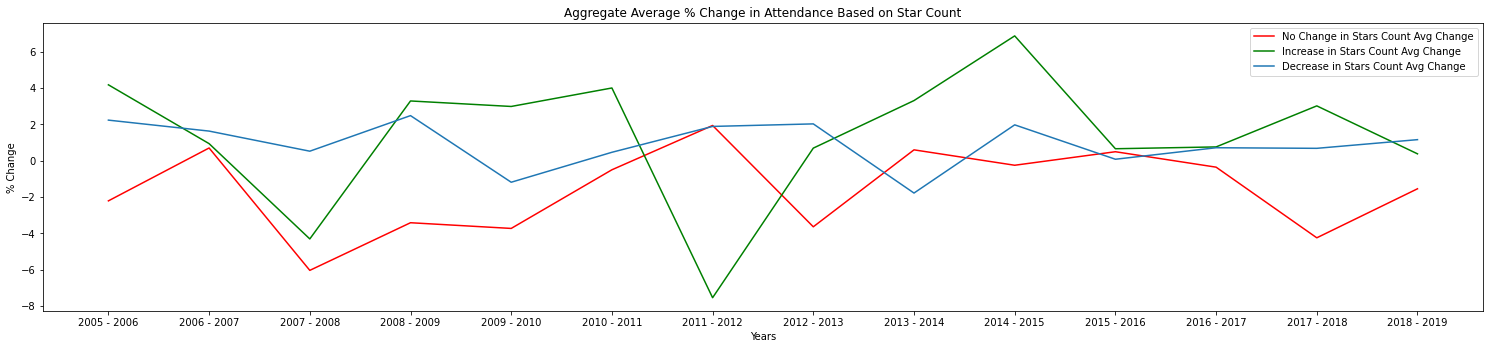

In [767]:
fig_avg_change = plt.figure(figsize = (20,4))
ax1 = fig_avg_change.add_axes([0, 0 , 1, 1])

neg_dates = list(yearly_neg_star_avg.keys())        
neg_change = list(yearly_neg_star_avg.values())
sns.lineplot(x = neg_dates, y = neg_change, label = 'No Change in Stars Count Avg Change', color ='r')


pos_dates = list(yearly_pos_star_avg.keys())        
pos_change = list(yearly_pos_star_avg.values())
sns.lineplot(x = pos_dates, y = pos_change, label = 'Increase in Stars Count Avg Change', color = 'g')

reg_dates = list(yearly_no_star_avg.keys())        
reg_change = list(yearly_no_star_avg.values())
sns.lineplot(x = reg_dates, y = reg_change, label = 'Decrease in Stars Count Avg Change')


ax1.set_xlabel('Years')
ax1.set_ylabel('% Change')
ax1.set_title('Aggregate Average % Change in Attendance Based on Star Count')

ax1.legend()

## testing ends here

In [577]:
dfz

,2005 - 2006 change in stars,2005 - 2006 change in attendance,2005 - 2006 % change in attendance,2006 - 2007 change in stars,2006 - 2007 change in attendance,2006 - 2007 % change in attendance,2007 - 2008 change in stars,2007 - 2008 change in attendance,2007 - 2008 % change in attendance,2008 - 2009 change in stars,...,2015 - 2016 % change in attendance,2016 - 2017 change in stars,2016 - 2017 change in attendance,2016 - 2017 % change in attendance,2017 - 2018 change in stars,2017 - 2018 change in attendance,2017 - 2018 % change in attendance,2018 - 2019 change in stars,2018 - 2019 change in attendance,2018 - 2019 % change in attendance
Warriors,0.0,78817.0,11.76%,-1.0,-6918.0,-0.92%,1.0,62597.0,8.43%,1.0,...,0.00%,1.0,0.0,0.00%,0.0,0.0,0.00%,0.0,0.0,0.00%
Mavericks,0.0,2160.0,0.26%,1.0,9718.0,1.18%,1.0,-2673.0,-0.32%,-1.0,...,-0.22%,0.0,-14535.0,-1.76%,0.0,87.0,0.01%,1.0,9116.0,1.12%
Bucks,0.0,44328.0,6.96%,1.0,-17708.0,-2.60%,-1.0,-24208.0,-3.65%,0.0,...,1.73%,-1.0,27144.0,4.37%,1.0,36351.0,5.60%,-2.0,36389.0,5.31%
76ers,0.0,-55408.0,-7.56%,-1.0,-68675.0,-10.14%,1.0,1072.0,0.18%,0.0,...,6.74%,1.0,100436.0,16.46%,1.0,122946.0,17.30%,2.0,4589.0,0.55%
Trail Blazers,-1.0,-63355.0,-9.31%,1.0,53759.0,8.71%,0.0,130788.0,19.50%,1.0,...,-0.95%,0.0,-2056.0,-0.26%,0.0,3299.0,0.42%,0.0,4017.0,0.51%
Heat,0.0,3006.0,0.37%,-1.0,-9608.0,-1.17%,1.0,-10537.0,-1.30%,-1.0,...,0.14%,-1.0,-3950.0,-0.49%,-1.0,-20150.0,-2.50%,-1.0,20014.0,2.55%
Rockets,0.0,-27334.0,-4.12%,0.0,42252.0,6.64%,0.0,40162.0,5.92%,-1.0,...,-1.36%,-1.0,-41341.0,-5.61%,2.0,20105.0,2.89%,0.0,24384.0,3.41%
Raptors,1.0,-4056.0,-0.58%,-1.0,49271.0,7.05%,0.0,48232.0,6.44%,1.0,...,0.38%,0.0,187.0,0.02%,0.0,381.0,0.05%,1.0,-609.0,-0.07%
Celtics,0.0,36792.0,5.61%,0.0,-2297.0,-0.33%,0.0,73008.0,10.57%,1.0,...,3.84%,1.0,11614.0,1.55%,-1.0,-15730.0,-2.07%,0.0,18624.0,2.50%
Thunder,0.0,-11333.0,-1.68%,0.0,-9994.0,-1.50%,-2.0,-106607.0,-16.30%,1.0,...,0.00%,-1.0,0.0,0.00%,1.0,0.0,0.00%,0.0,0.0,0.00%


In [673]:
dfz[r'2011 - 2012 % change in attendance']

Warriors         -18.80%
Mavericks        -18.58%
Bucks            -23.14%
76ers             -4.50%
Trail Blazers    -19.57%
Heat             -18.88%
Rockets          -23.63%
Raptors          -18.20%
Celtics          -19.51%
Thunder          -19.27%
Jazz             -20.36%
Lakers           -19.51%
Cavaliers        -36.26%
Spurs            -19.15%
Kings            -15.93%
Bulls            -18.15%
NY Knicks        -19.37%
Nuggets          -18.90%
Magic            -19.83%
Pelicans         -17.32%
Pacers           -15.77%
Clippers         -12.82%
Hornets          -25.04%
Wizards          -19.82%
Grizzlies        -13.72%
Nets             -20.75%
Suns             -28.54%
Hawks            -21.82%
Timberwolves      -7.64%
Pistons          -30.37%
Name: 2011 - 2012 % change in attendance, dtype: object

In [674]:
dfz[r'2011 - 2012 change in stars']

Warriors        -1.0
Mavericks        0.0
Bucks            1.0
76ers           -1.0
Trail Blazers    0.0
Heat             0.0
Rockets         -1.0
Raptors          0.0
Celtics          0.0
Thunder          1.0
Jazz             0.0
Lakers           0.0
Cavaliers        1.0
Spurs           -1.0
Kings            1.0
Bulls            0.0
NY Knicks        0.0
Nuggets          0.0
Magic            0.0
Pelicans         0.0
Pacers           0.0
Clippers         0.0
Hornets          0.0
Wizards         -1.0
Grizzlies        0.0
Nets             0.0
Suns             1.0
Hawks           -1.0
Timberwolves     0.0
Pistons          1.0
Name: 2011 - 2012 change in stars, dtype: float64

In [693]:
#no_star = 0 # 
yearly_no_star_avg = {} # dictionary of the average % change in attendance of teams with no change in the amount of star players
for year in range(2005, 2019):
    no_star_count = 0 # variable for the number of teams with no change in the amount of star players
    no_star_perc_change = 0 # variable for the aggregate % change in attendance with no change in amount of star players
    for team in zteams_id.keys():
        if dfz[f'{year} - {year + 1} change in stars'][team] == 0:
            no_star_perc_change += float(dfz[f'{year} - {year + 1} % change in attendance'][team].split('%')[0])
            no_star_count += 1
    yearly_no_star_avg[f'{year} - {year + 1}'] = no_star_perc_change / no_star_count # aggregate mean of % change in attendance of teams with no changes in stars for each respective year
yearly_no_star_avg

{'2005 - 2006': 2.230714285714286,
 '2006 - 2007': 1.6274999999999997,
 '2007 - 2008': 0.5213333333333342,
 '2008 - 2009': 2.4789999999999996,
 '2009 - 2010': -1.1876923076923076,
 '2010 - 2011': 0.4607142857142855,
 '2011 - 2012': -17.99555555555556,
 '2012 - 2013': 26.75894736842105,
 '2013 - 2014': -1.783,
 '2014 - 2015': 1.9712499999999997,
 '2015 - 2016': 0.07777777777777775,
 '2016 - 2017': 0.7110000000000001,
 '2017 - 2018': 0.6785714285714286,
 '2018 - 2019': 1.1563636363636365}

In [618]:
yearly_pos_star_avg = {} # dictionary of the average % change in attendance of teams with a change in the amount of star players
for year in range(2005, 2019):
    team_star_count = 0 # variable for the number of teams with a change in the amount of star players
    star_perc_change = 0 # variable for the aggregate % change in attendance with a change in amount of star players
    for team in zteams_id.keys():
        if dfz[f'{year} - {year + 1} change in stars'][team] > 0:
            star_perc_change += float(dfz[f'{year} - {year + 1} % change in attendance'][team].split('%')[0])
            team_star_count += int(dfz[f'{year} - {year + 1} change in stars'][team])
    yearly_pos_star_avg[f'{year} - {year + 1}'] = star_perc_change / team_star_count # aggregate mean of % change in attendance of teams with a change in the amount of stars for each respective year
yearly_pos_star_avg

{'2005 - 2006': 2.89,
 '2006 - 2007': 0.7490000000000001,
 '2007 - 2008': -4.307777777777778,
 '2008 - 2009': 2.688181818181818,
 '2009 - 2010': 2.088,
 '2010 - 2011': 3.2,
 '2011 - 2012': -25.584999999999997,
 '2012 - 2013': 20.916666666666668,
 '2013 - 2014': 2.543846153846154,
 '2014 - 2015': 5.341111111111111,
 '2015 - 2016': 0.4685714285714285,
 '2016 - 2017': 0.756,
 '2017 - 2018': 2.6799999999999997,
 '2018 - 2019': 0.28846153846153844}

In [706]:
yearly_pos_star_avg = {} # dictionary of the average % change in attendance of teams with a change in the amount of star players
for year in range(2005, 2019):
    team_star_count = 0 # variable for the number of teams with a change in the amount of star players
    star_perc_change = 0 # variable for the aggregate % change in attendance with a change in amount of star players
    for team in zteams_id.keys():
        if dfz[f'{year} - {year + 1} change in stars'][team] > 0:
            star_perc_change += float(dfz[f'{year} - {year + 1} % change in attendance'][team].split('%')[0])
            team_star_count += 1
    yearly_pos_star_avg[f'{year} - {year + 1}'] = star_perc_change / team_star_count # aggregate mean of % change in attendance of teams with a change in the amount of stars for each respective year

yearly_pos_star_avg

{'2005 - 2006': 4.174444444444444,
 '2006 - 2007': 0.9362500000000001,
 '2007 - 2008': -4.307777777777778,
 '2008 - 2009': 3.2855555555555553,
 '2009 - 2010': 2.9828571428571427,
 '2010 - 2011': 4.0,
 '2011 - 2012': -25.584999999999997,
 '2012 - 2013': 25.1,
 '2013 - 2014': 3.307,
 '2014 - 2015': 6.867142857142857,
 '2015 - 2016': 0.6559999999999999,
 '2016 - 2017': 0.756,
 '2017 - 2018': 3.0149999999999997,
 '2018 - 2019': 0.375}

In [703]:
yearly_neg_star_avg = {} # dictionary of the average % change in attendance of teams with a change in the amount of star players
for year in range(2005, 2019):
    team_star_count = 0 # variable for the number of teams with a change in the amount of star players
    star_perc_change = 0 # variable for the aggregate % change in attendance with a change in amount of star players
    for team in zteams_id.keys():
        if dfz[f'{year} - {year + 1} change in stars'][team] < 0:
            star_perc_change += float(dfz[f'{year} - {year + 1} % change in attendance'][team].split('%')[0])
            team_star_count += int(dfz[f'{year} - {year + 1} change in stars'][team])
    yearly_neg_star_avg[f'{year} - {year + 1}'] = star_perc_change / team_star_count # aggregate mean of % change in attendance of teams with a change in the amount of stars for each respective year
    
print(yearly_neg_star_avg)

{'2005 - 2006': 2.2128571428571426, '2006 - 2007': -0.6979999999999998, '2007 - 2008': 4.025555555555556, '2008 - 2009': 3.416363636363637, '2009 - 2010': 3.7300000000000004, '2010 - 2011': 0.40199999999999986, '2011 - 2012': 17.953333333333333, '2012 - 2013': -19.718333333333334, '2013 - 2014': -0.45769230769230757, '2014 - 2015': 0.19666666666666666, '2015 - 2016': -0.4914285714285711, '2016 - 2017': 0.358, '2017 - 2018': 3.7744444444444443, '2018 - 2019': 0.995}
-14


In [708]:
yearly_neg_star_avg = {} # dictionary of the average % change in attendance of teams with a change in the amount of star players
for year in range(2005, 2019):
    team_star_count = 0 # variable for the number of teams with a change in the amount of star players
    star_perc_change = 0 # variable for the aggregate % change in attendance with a change in amount of star players
    for team in zteams_id.keys():
        if dfz[f'{year} - {year + 1} change in stars'][team] < 0:
            star_perc_change += float(dfz[f'{year} - {year + 1} % change in attendance'][team].split('%')[0])
            team_star_count += 1
    yearly_neg_star_avg[f'{year} - {year + 1}'] = star_perc_change / team_star_count # aggregate mean of % change in attendance of teams with a change in the amount of stars for each respective year
yearly_neg_star_avg

{'2005 - 2006': -2.2128571428571426,
 '2006 - 2007': 0.6979999999999998,
 '2007 - 2008': -6.038333333333334,
 '2008 - 2009': -3.416363636363637,
 '2009 - 2010': -3.7300000000000004,
 '2010 - 2011': -0.5024999999999998,
 '2011 - 2012': -17.953333333333333,
 '2012 - 2013': 19.718333333333334,
 '2013 - 2014': 0.5949999999999999,
 '2014 - 2015': -0.25285714285714284,
 '2015 - 2016': 0.4914285714285711,
 '2016 - 2017': -0.358,
 '2017 - 2018': -4.24625,
 '2018 - 2019': -1.5477777777777777}

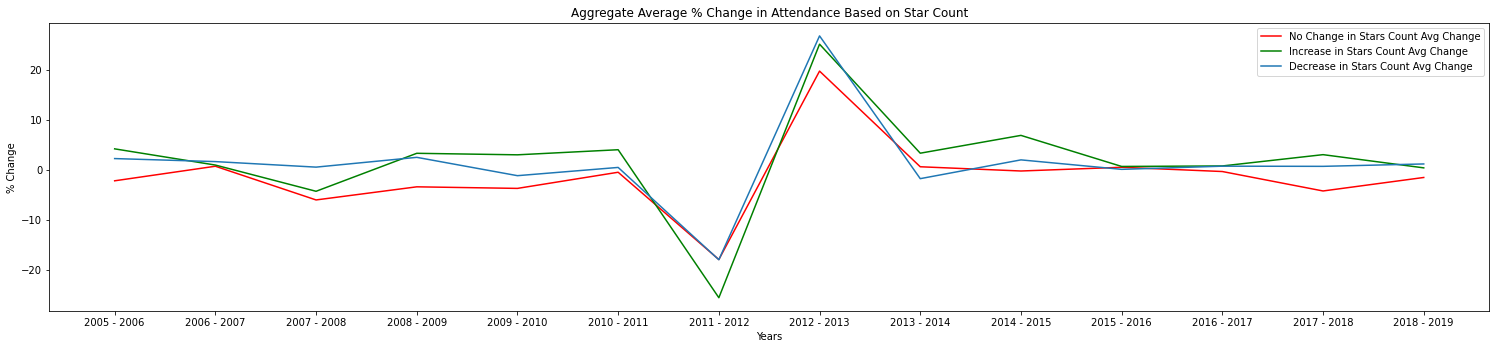

In [685]:
# colors = list("rgbcmyk")
# for data_dict in yearly_neg_star_avg.values():
#     x = yearly_neg_star_avg.keys()
#     y = yearly_neg_star_avg.values()
#     plt.scatter(x, y, color = colors.pop())

# plt.legend(yearly_neg_star_avg.keys())
# plt.show()

fig_avg_change = plt.figure(figsize = (20,4))
ax1 = fig_avg_change.add_axes([0, 0 , 1, 1])

neg_dates = list(yearly_neg_star_avg.keys())        
neg_change = list(yearly_neg_star_avg.values())
sns.lineplot(x = neg_dates, y = neg_change, label = 'No Change in Stars Count Avg Change', color ='r')


pos_dates = list(yearly_pos_star_avg.keys())        
pos_change = list(yearly_pos_star_avg.values())
sns.lineplot(x = pos_dates, y = pos_change, label = 'Increase in Stars Count Avg Change', color = 'g')

reg_dates = list(yearly_no_star_avg.keys())        
reg_change = list(yearly_no_star_avg.values())
sns.lineplot(x = reg_dates, y = reg_change, label = 'Decrease in Stars Count Avg Change')


ax1.set_xlabel('Years')
ax1.set_ylabel('% Change')
ax1.set_title('Aggregate Average % Change in Attendance Based on Star Count')

ax1.legend()

In [543]:
dfz

,2005 - 2006 change in stars,2005 - 2006 change in attendance,2005 - 2006 % change in attendance,2006 - 2007 change in stars,2006 - 2007 change in attendance,2006 - 2007 % change in attendance,2007 - 2008 change in stars,2007 - 2008 change in attendance,2007 - 2008 % change in attendance,2008 - 2009 change in stars,...,2015 - 2016 % change in attendance,2016 - 2017 change in stars,2016 - 2017 change in attendance,2016 - 2017 % change in attendance,2017 - 2018 change in stars,2017 - 2018 change in attendance,2017 - 2018 % change in attendance,2018 - 2019 change in stars,2018 - 2019 change in attendance,2018 - 2019 % change in attendance
Warriors,0.0,78817.0,11.76%,-1.0,-6918.0,-0.92%,1.0,62597.0,8.43%,1.0,...,0.00%,1.0,0.0,0.00%,0.0,0.0,0.00%,0.0,0.0,0.00%


In [545]:
tix_df_dummy.head()

,2005 Total Home Tix Sold,2005 Avg Home Tix Sold,2006 Total Home Tix Sold,2006 Avg Home Tix Sold,2007 Total Home Tix Sold,2007 Avg Home Tix Sold,2008 Total Home Tix Sold,2008 Avg Home Tix Sold,2009 Total Home Tix Sold,2009 Avg Home Tix Sold,...,2015 Total Home Tix Sold,2015 Avg Home Tix Sold,2016 Total Home Tix Sold,2016 Avg Home Tix Sold,2017 Total Home Tix Sold,2017 Avg Home Tix Sold,2018 Total Home Tix Sold,2018 Avg Home Tix Sold,2019 Total Home Tix Sold,2019 Avg Home Tix Sold
Heat,"815,143",19881.54,"818,149",19954.85,"808,541",19720.51,"798,004",19463.51,"729,178",17784.83,...,"808,223",19712.76,"809,350",19740.24,"805,400",19643.9,"785,250",19152.44,"805,264",19640.59
NY Knicks,"800,144",19515.71,"776,176",18931.12,"771,017",18805.29,"783,739",19115.59,"790,801",19287.83,...,"812,292",19812.0,"812,292",19812.0,"810,741",19774.17,"792,608",19331.9,"779,087",19002.12
Pistons,"905,116",22076.0,"905,116",22076.0,"905,116",22076.0,"905,116",22076.0,"896,971",21877.34,...,"625,917",15266.27,"677,138",16515.56,"655,141",15979.05,"713,945",17413.29,"675,963",16486.9
Kings,"709,997",17317.0,"709,997",17317.0,"709,997",17317.0,"580,181",14150.76,"502,852",12264.68,...,"680,049",16586.56,"707,526",17256.73,"721,928",17608.0,"649,571",15843.2,"700,975",17096.95
Spurs,"750,970",18316.34,"770,677",18797.0,"764,823",18654.22,"761,149",18564.61,"749,048",18269.46,...,"762,855",18606.22,"756,445",18449.88,"755,347",18423.1,"754,562",18403.95,"750,616",18307.71


In [557]:
'{:0.2f}'.format(pd.to_numeric(tix_df_dummy['2006 Total Home Tix Sold'].replace(',','',regex=True)).mean() - pd.to_numeric(tix_df_dummy['2005 Total Home Tix Sold'].replace(',','',regex=True)).mean())

'9976.90'

In [568]:
'{:0.2f}'.format((pd.to_numeric(tix_df_dummy['2006 Total Home Tix Sold'].replace(',','',regex=True)).mean() - pd.to_numeric(tix_df_dummy['2005 Total Home Tix Sold'].replace(',','',regex=True)).mean())/41)

'243.34'

In [769]:
yearly_pos_star_avg_list = [float(x) for x in yearly_pos_star_avg.values()]
yearly_neg_star_avg_list = [float(x) for x in yearly_neg_star_avg.values()]
yearly_no_star_avg_list = [float(x) for x in yearly_no_star_avg.values()]
import scipy.stats as stats

print(stats.ttest_ind(a = yearly_no_star_avg_list, b = yearly_pos_star_avg_list, equal_var = False))
print(stats.ttest_ind(a = yearly_no_star_avg_list, b = yearly_neg_star_avg_list, equal_var = False))

Ttest_indResult(statistic=-0.440169196245094, pvalue=0.66566220021843)
Ttest_indResult(statistic=3.533316317852393, pvalue=0.0020787730118925515)


In [791]:
from statistics import stdev
from math import sqrt
neg_stdev = stdev(yearly_neg_star_avg_list)
pos_stdev = stdev(yearly_pos_star_avg_list)
no_stdev = stdev(yearly_no_star_avg_list)
#print(neg_stdev, pos_stdev, no_stdev)

def ttest(sample1, sample2):
    mean1 = sum(sample1) / len(sample1)
    mean2 = sum(sample2) / len(sample2)
    t = (mean1 - mean2) / sqrt(((stdev(sample1)**2)/float(len(sample1))) + ((stdev(sample2)**2)/float(len(sample2))))
    return t

print(ttest(yearly_pos_star_avg_list, yearly_no_star_avg_list), ttest(yearly_neg_star_avg_list, yearly_no_star_avg_list))


0.440169196245094 -3.533316317852393
